In [ ]:
import urllib.request
import six
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image

In [ ]:
tv_type = 'doramy'
page_num = 200
url = f'https://softbox.tv/'

In [ ]:
response = requests.get(url)
response
print(url)

https://softbox.tv/


In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru" prefix="og: http://ogp.me/ns#
              video: http://ogp.me/ns/video#
              ya: http://webmaster.yandex.ru/vocabularies/">
 <head>
  <script async="" data-ad-client="ca-pub-6761736138875948" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <!-- DLE Meta тэги -->
  <meta charset="utf-8"/>
  <title>
   Дорамы в озвучке SOFTBOX
  </title>
  <meta content="SOFTBOX - Самая Быстрая и Качественная озвучка! Дорамы онлайн.  Смотреть дорамы с русской озвучкой онлайн в хорошем hd качестве 720, 1080 бесплатно" name="description"/>
  <meta content="softbox, SoftBox, SOFTBOX, softbox tv, дорамы softbox, озвучка softbox, смотреть дорамы в озвучке softbox, смотреть дорамы, смотреть, Фильмы, бесплатно, хорошем, качестве Смотреть фильм, смотреть онлайн, смотреть бесплатно, хорошее качество, смотреть бесплатно в хорошем качестве, смотреть фильм онлайн, фильм, фильмы бесплатно, кино онлайн, новинки кино, hd 720 качестве, аниме

In [ ]:
tv_genres_block = soup.find_all('div', 'dle-filter-block d-flex justify-content-between align-items-center')[0]
tv_genres = tv_genres_block.find_all('option')[1:45]
tv_genres_names = [tv_genre.text.strip() for tv_genre in tv_genres]
tv_genres_codes = [tv_genre['value'] for tv_genre in tv_genres]
tv_genres_code_to_name = dict(zip(tv_genres_names, tv_genres_codes))
tv_genres_code_to_name

{'арт-хаус': '14',
 'бизнес': '15',
 'биография': '16',
 'боевик': '17',
 'боевые искусства': '18',
 'вампиры': '19',
 'вестерн': '20',
 'военный': '21',
 'гендерная интрига': '22',
 'детектив': '23',
 'документальный': '24',
 'драма': '25',
 'дружба': '26',
 'игра': '27',
 'исторический': '28',
 'катастрофа': '29',
 'комедия': '30',
 'концерт': '31',
 'криминал': '32',
 'лайв-экшн': '33',
 'медицина': '34',
 'мелодрама': '35',
 'мистика': '36',
 'музыкальный': '37',
 'мюзикл': '38',
 'научная фантастика': '39',
 'пародия': '40',
 'повседневность': '41',
 'политика': '42',
 'приключения': '43',
 'психология': '44',
 'романтика': '45',
 'саспенс': '46',
 'семейный': '47',
 'ситком': '48',
 'сказка': '49',
 'спорт': '50',
 'телешоу': '51',
 'трагедия': '52',
 'триллер': '53',
 'ужасы': '54',
 'фантастика': '55',
 'фэнтези': '56',
 'школа': '57'}

In [ ]:
tv_countries_block = soup.find_all('div', 'dle-filter-block d-flex justify-content-between align-items-center')[0]
tv_countries = tv_countries_block.find_all('option')[46:]
tv_countries_names = [tv_country.text.strip() for tv_country in tv_countries]
tv_countries_codes = [tv_country['value'] for tv_country in tv_countries]
tv_countries_code_to_name = dict(zip(tv_countries_names, tv_countries_codes))
tv_countries_code_to_name

{'Вьетнам': '80',
 'Гонконг': '81',
 'Индонезия': '82',
 'Китай': '83',
 'Малайзия': '84',
 'Сингапур': '85',
 'Таиланд': '86',
 'Тайвань': '87',
 'Филиппины': '88',
 'Южная Корея': '89',
 'Япония': '90'}

In [ ]:
tv_types_block = soup.find_all('div', 'dle-filter-block d-flex justify-content-between align-items-center')[1]
tv_types = tv_types_block.find_all('option')[1:5]
tv_types_names = [tv_type.text.strip() for tv_type in tv_types]
tv_types_codes = [tv_type['value'] for tv_type in tv_types]
tv_types_code_to_name = dict(zip(tv_types_names, tv_types_codes))
tv_types_code_to_name

{'Аниме': '12', 'Дорама': '9', 'Фильм': '10', 'Шоу': '11'}

In [ ]:
tv_channels_block = soup.find_all('div', 'dle-filter-block d-flex justify-content-between align-items-center')[1]
tv_channels = tv_channels_block.find_all('option')[7:]
tv_channels_names = [tv_channel.text.strip() for tv_channel in tv_channels]
tv_channels_codes = [tv_channel['value'] for tv_channel in tv_channels]
tv_channels_code_to_name = dict(zip(tv_channels_names, tv_channels_codes))
tv_channels_code_to_name

{'Channel A': '104',
 'Dramax': '107',
 'E Channel': '105',
 'JTBC': '97',
 'KBS Drama': '98',
 'KBS W': '99',
 'MBC': '93',
 'MBC Dramanet': '100',
 'MBN': '103',
 'Netflix': '109',
 'OCN': '95',
 'Olive TV': '108',
 'OnStyle': '106',
 'SBS': '94',
 'SBS Plus': '101',
 'TV Chosun': '102',
 'tvN': '96'}

In [ ]:
genre_num = tv_genres_code_to_name['криминал']
channel_num = tv_channels_code_to_name['SBS']
type_num = tv_types_code_to_name['Дорама']
country_num = tv_countries_code_to_name['Южная Корея']


url = f'https://softbox.tv/f/cat={genre_num},{country_num},{type_num},{channel_num}/sort=date/order=asc/'
response = requests.get(url)
soup_str = BeautifulSoup(response.content, 'html.parser')


In [ ]:
print(soup_str.prettify())

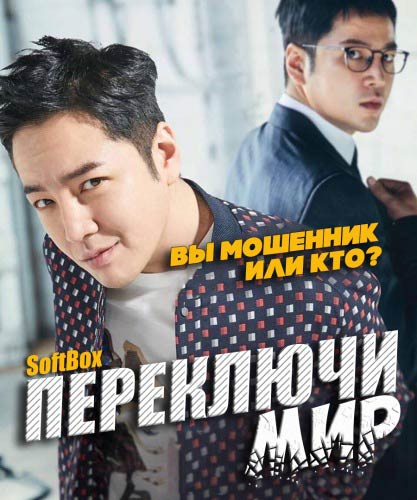

In [246]:
needed_things_block = soup_str.find_all('article', 'moviebox col-6 col-sm-6 col-md-4 col-lg-4 col-xl-4 mb-3')
nt_name = needed_things_block[0].find('div','original-title u-txtcolor-gray u-txt-ellipsis u-small').text    #NAME
nt_url = needed_things_block[0].find('a', 'd-flex flex-column flex-column-reverse an')['href']
nt_pic = 'https://softbox.tv' + needed_things_block[0].find('figure').find('img')['data-src']
nt_rating = needed_things_block[0].find_all('span', 'u-small')[1].text 
Image(nt_pic)

#needed_things_block[0].find_all()

In [ ]:
names = []
urls = []
pics = []
ratings = []
max_num_pages = 35
good_response_status = 200
for thing in needed_things_block:
  names.append(thing.find('div','original-title u-txtcolor-gray u-txt-ellipsis u-small').text)
  urls.append(thing.find('a', 'd-flex flex-column flex-column-reverse an')['href'])
  pics.append(Image('https://softbox.tv' + thing.find('figure').find('img')['data-src']))
  ratings.append(thing.find_all('span', 'u-small')[1].text)

In [239]:
import pandas as pd

df = pd.DataFrame(
    {
        'names': names,
        'urls': urls,
        'ratings': ratings,
        'pics': pics
    }
)

In [240]:
df.to_csv('series.csv', encoding='utf-8', index=False)
df = pd.read_csv('series.csv')
df.head()

,names,urls,ratings,pics
0,Switch: Change the World | 스위치 - 세상을 바꿔라,https://softbox.tv/169-perekljuchi-mir.html,9.07,<IPython.core.display.Image object>
1,The Fiery Priest | 열혈사제,https://softbox.tv/344-vspylchivyj-svjaschenni...,9.63,<IPython.core.display.Image object>
2,Ugly Alert | 보 마이 라이프,https://softbox.tv/373-moj-urodlivyj-bratec.html,8.61,<IPython.core.display.Image object>
3,Nobody Knows | 아무도 모른다,https://softbox.tv/437-nikto-ne-znaet.html,9.12,<IPython.core.display.Image object>


In [209]:
pip install pytelegrambotapi

     |████████████████████████████████| 102kB 5.7MB/s 
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-3.8.1-cp37-none-any.whl size=75902 sha256=3efc8fc722a7cc29d0aaab2fb7dcc0ad5e99d8f4cb367acd92c6b9b5e593cb67
  Stored in directory: /root/.cache/pip/wheels/df/97/1c/6bf3934203f0673ac6c3e6aecb0bead54f95df437f492f5d4e
Successfully built pytelegrambotapi


In [224]:

import telebot
bot = telebot.TeleBot('1909610752:AAHnlqIlmQZmiHlge2GFLxiOJHVjXjYSxE8')

In [225]:
from telebot import types

In [245]:
genre = ''
ttype = ''
country = ''
channel = ''
@bot.message_handler(content_types=['text'])
def start(message):
    if message.text == '/start':
        bot.send_message(message.from_user.id, "Здравствуйте! Введите, пожалуйста, страну сериала с большой буквы")
        bot.register_next_step_handler(message, get_country) 

def get_country(message): 
    global country
    country = message.text
    bot.send_message(message.from_user.id, 'Введите, пожалуйста, жанр сериала с маленькой буквы')
    bot.register_next_step_handler(message, get_genre)

def get_genre(message):
    global genre
    genre = message.text
    bot.send_message(message.from_user.id,'Введите, пожалуйста, что именно вы хотите смотреть. Аниме? Дорама? Фильм? Шоу?')
    bot.register_next_step_handler(message, get_type)

def get_type(message):
    global ttype
    ttype = message.text
    bot.send_message(message.from_user.id,'Введите, пожалуйста, производство какого канала вы бы хотели посмореть?')
    bot.register_next_step_handler(message, get_channel)

def get_channel(message):
    global channel
    channel = message.text
    scrapping()
    i = 0   
    for name in names:
      bot.send_message(message.from_user.id, f'{name}, {ratings[i]}\n')
      bot.send_message(message.from_user.id, f'{urls[i]}\n')
      i = i + 1

def scrapping():
  genre_num = tv_genres_code_to_name[f'{genre}']
  channel_num = tv_channels_code_to_name[f'{channel}']
  type_num = tv_types_code_to_name[f'{ttype}']
  country_num = tv_countries_code_to_name[f'{country}']

  url = f'https://softbox.tv/f/cat={genre_num},{country_num},{type_num},{channel_num}/sort=date/order=asc/'
  response = requests.get(url)
  soup_str = BeautifulSoup(response.content, 'html.parser') 

  needed_things_block = soup_str.find_all('article', 'moviebox col-6 col-sm-6 col-md-4 col-lg-4 col-xl-4 mb-3')
  names = []
  urls = []
  ratings = []
  for thing in needed_things_block:
     names.append(thing.find('div','original-title u-txtcolor-gray u-txt-ellipsis u-small').text)
     urls.append(thing.find('a', 'd-flex flex-column flex-column-reverse an')['href'])
     ratings.append(thing.find_all('span', 'u-small')[1].text)


bot.polling(none_stop=True, interval=0)

In [247]:
pip freeze > requirements.txt